[1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0]
Confusion matrix, without normalization
[[12  0  0]
 [ 0 15  0]
 [ 0  1  9]]
[0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 0]
Confusion matrix, without normalization
[[17  0  0]
 [ 0  8  0]
 [ 0  0 12]]
[2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1]
Confusion matrix, without normalization
[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 18]]
[1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2]
Confusion matrix, without normalization
[[11  0  0]
 [ 0 16  1]
 [ 0  0  9]]
[97.2972972972973, 100.0, 97.2972972972973, 97.2972972972973]
Mean Accuracy: 97.973%


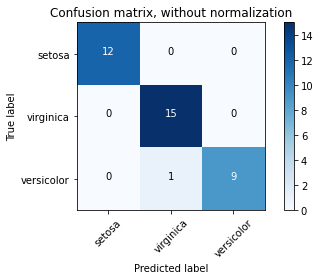

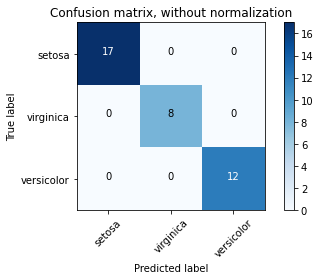

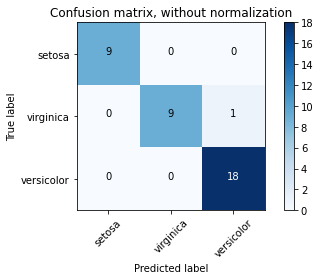

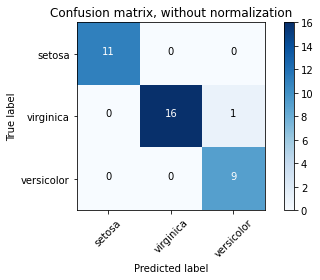

In [2]:
import numpy as np
from csv import reader
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi
import random 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import requests





# function for plot confusion matrix with actual_l and predicted_l calculated by me
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
    














# Load a CSV Iris data
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float(for make it possible work with data and labels)
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer(for make it possible work with data and labels)
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup



def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split



random.seed(datetime.now())
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

dataset0=[]
dataset1=[]
dataset2=[]
training_test0=[]
testing_test0=[]


for rows in dataset:
    if rows[4]==2:
        dataset2.append(rows)
    elif rows[4]==1:
        dataset1.append(rows)
    else:
        dataset0.append(rows)
        
random.shuffle(dataset0)
random.shuffle(dataset1)
random.shuffle(dataset2)

training_test0=dataset0[0:50]+dataset1[0:50]+dataset2[0:50]



#Convert data set to arrays for using in mean and Cov 
X = np.array([ x[0:4] for x in training_test0 if len(x)==5 ], dtype='float64')
X.shape




mu0 = np.mean(X[0:50,:],axis=0)
mu1 = np.mean(X[50:100,:],axis=0)
mu2 = np.mean(X[100:150,:],axis=0)


Sig0 = np.cov(X[0:50,:],rowvar=False)
Sig1 = np.cov(X[50:100,:],rowvar=False)
Sig2 = np.cov(X[100:150,:],rowvar=False)

##delete # for make the Cov matrix to diagonal matrix 
#for i in range(len(Sig0)):
#    for j in range(len(Sig0[i])):
#        if i != j:
#            Sig0[i][j] = 0            

#for i in range(len(Sig1)):
#    for j in range(len(Sig0[i])):
#        if i != j:
#            Sig1[i][j] = 0


#for i in range(len(Sig0)):
#    for j in range(len(Sig2[i])):
#        if i != j:
#            Sig2[i][j] = 0

##it is clear , it is our function to calculate probability
def BayesClassifier(test_point,mean,variance):
    mean = np.array([mean])
    X = test_point-mean
    p1 = ((1/(2*pi)**0.5)/(np.linalg.det(variance)))**0.5
    p2 = np.exp(-0.5*np.matmul(np.matmul(X,np.linalg.inv(variance)),np.transpose(X)))
    P = (1/3)*p1*p2     # 1/3 is the prior probability
    return(P)

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0



##finding max probability of each class for testing data and save them into predicted_l and actual_l for calculating accuracy
##and make confusion matrix(just make a function for better enhancement and work with FoldS)
def evaluate_algorithm(dataset,n_folds):   
    train_set=list() 
    test_set1=list()    
    row_copy=list() 
    predicted_l=list()
    actual_l=list()
    scores=list()
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:

        
        for row in fold:
            row_copy=list(row)
            test_set1.append(row_copy)
            row_copy[-1]=None
            
          
        actual_l = [row[-1] for row in fold]
        
        
        
        for row in test_set1:
            
    # virginica flower type probability calculation call
            prob_virginica = BayesClassifier(row[0:4],mu1,Sig1)
    
    # setosa flower type probability calculation call
            prob_setosa = BayesClassifier(row[0:4],mu0,Sig0)
    
    # versicolor flower type probability calculation call
            prob_versicolor = BayesClassifier(row[0:4],mu2,Sig2)
    
            if(max(prob_virginica,prob_setosa,prob_versicolor)==prob_virginica):
                predicted_l.append(1)
            elif(max(prob_virginica,prob_setosa,prob_versicolor)==prob_setosa):
                predicted_l.append(0)
            elif(max(prob_virginica,prob_setosa,prob_versicolor)==prob_versicolor):
                predicted_l.append(2)
        test_set1=[]    
        print(predicted_l)        
        y_predicted=pd.Series(predicted_l,name="predicted")
        y_actual=pd.Series(actual_l,name="actual")
        df_confusion=pd.crosstab(y_predicted,y_actual)
        x=df_confusion.to_numpy()
        cnf_matrix = x
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['setosa', 'virginica', 'versicolor'],
                      title='Confusion matrix, without normalization')
        accuracy = accuracy_metric(actual_l, predicted_l)
        predicted_l=[]
        scores.append(accuracy)
    return scores


   
        
n_folds = 4
scores = evaluate_algorithm(dataset, n_folds)
        
print(scores)        
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
        
        
        












